In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    stratify = iris.target,
                                                    random_state = 7)

print(x_train.shape, y_test.shape)

(112, 4) (38,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

iris_dt = DecisionTreeClassifier()
iris_dt.fit(x_train, y_train)

pred = iris_dt.predict(x_test)

print(accuracy_score(y_test, pred))    # 정확도
print(confusion_matrix(y_test, pred))  # 혼동행렬

0.9736842105263158
[[13  0  0]
 [ 0 12  1]
 [ 0  0 12]]


In [ ]:
iris_dt.feature_importances_ # 각 특성이 결정 트리 모델에서 예측을 위해 기여한 중요도의 상대적 비율

array([0.01785857, 0.        , 0.05846555, 0.92367589])

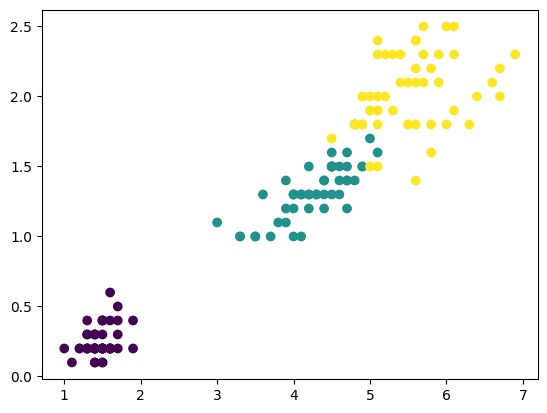

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target) # 산점도, c 클래스(0, 1, 2)에 따라 색상 지정
plt.show()

In [ ]:
for dep in range(1, 10):
  iris_dt = DecisionTreeClassifier(max_depth=dep) # max_depth 분기의 갯수 지정 (노드와 다음 노드의 depth는 1)
  iris_dt.fit(x_train, y_train)

  pred = iris_dt.predict(x_test)

  print(accuracy_score(y_test, pred))

0.6578947368421053
0.9736842105263158
0.9736842105263158
0.9210526315789473
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9736842105263158


In [ ]:
# DecisionTreeClassifier의 criterion은 gini임
for dep in range(1, 10):
  iris_dt = DecisionTreeClassifier(max_depth=dep, criterion='entropy')
  iris_dt.fit(x_train, y_train)

  pred = iris_dt.predict(x_test)

  print(accuracy_score(y_test, pred))

0.6578947368421053
0.9736842105263158
0.9736842105263158
0.9210526315789473
0.9473684210526315
0.9473684210526315
0.9210526315789473
0.9210526315789473
0.9210526315789473


[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\nentropy = 1.585\nsamples = 112\nvalue = [37, 37, 38]\nclass = virginica'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 75\nvalue = [0, 37, 38]\nclass = virginica'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]\nclass = virginica')]

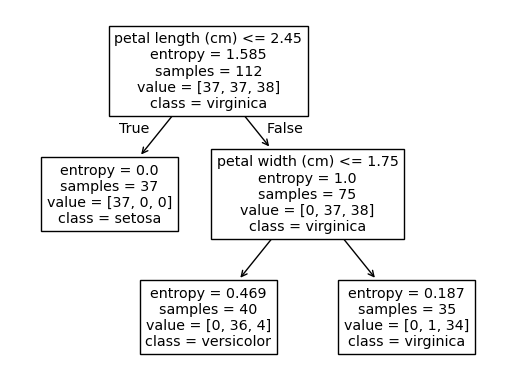

In [ ]:
from sklearn.tree import plot_tree

iris_dt = DecisionTreeClassifier(max_depth=2, criterion='entropy') # 위에서 accuracy_score가 가장 높은 depth 가져옴
iris_dt.fit(x_train, y_train)
plot_tree(iris_dt, # plot_tree 결정 트리 모델을 시각화
          feature_names=iris.feature_names, # 결정 트리의 각 분기 기준에 사용된 특성(feature)의 이름을 표시
          class_names=iris.target_names) # 클래스 레이블(타깃값)에 해당하는 이름

[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 112\nvalue = [37, 37, 38]\nclass = virginica'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 75\nvalue = [0, 37, 38]\nclass = virginica'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]\nclass = virginica')]

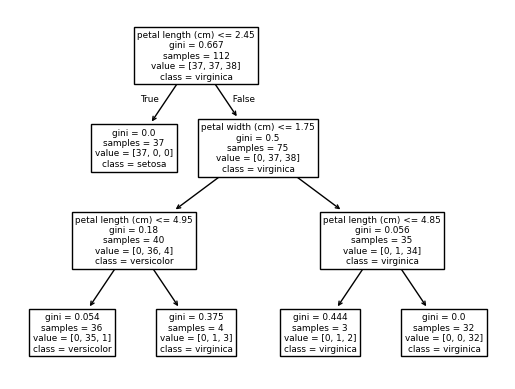

In [ ]:
from sklearn.tree import plot_tree
iris_dt = DecisionTreeClassifier(max_depth=3)
iris_dt.fit(x_train, y_train)
plot_tree(iris_dt,
          feature_names=iris.feature_names,
          class_names=iris.target_names)

In [ ]:
# 내 풀이
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# preprocess 전처리 -> classifier 모델
pip = Pipeline([
    ("preprocess", StandardScaler()),
    ("classifier", KNeighborsClassifier())
])

grid_param = [
    {
      "preprocess": [StandardScaler()],
      "classifier": [KNeighborsClassifier()],
      "classifier__n_neighbors": range(1, 40, 2)
    },
    {
        "preprocess": [FunctionTransformer()], # "preprocess": [None] 과 같음. 아무 것도 하지 않는 transformer
        "classifier": [GaussianNB()]
    },
    {
        "preprocess": [FunctionTransformer()],
        "classifier": [DecisionTreeClassifier()],
        "classifier__max_depth": range(1, 10)
    }
]

grid_m = GridSearchCV(
    pip,
    grid_param,
    cv=5, # 검증용 1, 훈련용 4
    return_train_score=True,
    verbose=3
)

grid_m.fit(cancer.data, cancer.target)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=0.956) total time=   0.1s
[CV 2/5] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=0.974) total time=   0.0s
[CV 3/5] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=0.974) total time=   0.0s
[CV 4/5] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=0.930) total time=   0.0s
[CV 5/5] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=0.938) total time=   0.0s
[CV 1/5] END classifier=KNeighborsClassifier(), classifier__n_neighbors=3, preprocess=StandardScaler();, score=(train=0.980, test=0.974) total time=   0.0s
[C

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': range(1, 40, 2),
                          'preprocess': [StandardScaler()]},
                         {'classifier': [GaussianNB()],
                          'preprocess': [FunctionTransformer()]},
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__max_depth': range(1, 10),
                          'preprocess': [FunctionTransformer()]}],
             return_train_score=True, verbose=3)

In [ ]:
grid_m.best_params_, grid_m.best_score_

({'classifier': KNeighborsClassifier(),
  'classifier__n_neighbors': 7,
  'preprocess': StandardScaler()},
 np.float64(0.9701288619779538))

In [ ]:
# 강사님 풀이

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

grid_param = [
    {
        "criterion": ["gini", "entropy"],
        "max_depth": range(1, 30) # 결과에서 max_depth가 30에 가깝다면 범위를 더 늘려서 확인해 봐야함
    }
]
cancer_dt = DecisionTreeClassifier()
grid_m = GridSearchCV(cancer_dt, grid_param, cv=10, return_train_score=True, verbose=3)

grid_m.fit(cancer.data, cancer.target)
print(grid_m.best_params_, grid_m.best_score_)

Fitting 10 folds for each of 58 candidates, totalling 580 fits
[CV 1/10] END criterion=gini, max_depth=1;, score=(train=0.924, test=0.877) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=1;, score=(train=0.930, test=0.860) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=1;, score=(train=0.926, test=0.895) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=1;, score=(train=0.928, test=0.842) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=1;, score=(train=0.922, test=0.930) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=1;, score=(train=0.924, test=0.912) total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=1;, score=(train=0.924, test=0.877) total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=1;, score=(train=0.920, test=0.912) total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=1;, score=(train=0.924, test=0.877) total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=1;, score=(train=0.920, test=0.911) total

In [ ]:
cancer_dt = DecisionTreeClassifier(criterion='entropy', max_depth=26)
cancer_dt.fit(cancer.data, cancer.target)
cancer_dt.feature_importances_ # 어떤 feature가 중요한지 확인하기

array([0.        , 0.        , 0.00665925, 0.        , 0.        ,
       0.        , 0.01197349, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01759705, 0.        ,
       0.        , 0.        , 0.        , 0.00508236, 0.04003005,
       0.        , 0.05690144, 0.68588894, 0.0259856 , 0.04462567,
       0.        , 0.        , 0.07702027, 0.02823588, 0.        ])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pip = Pipeline([
    ("prep_1", StandardScaler()),
    ("model", KNeighborsClassifier())
])

grid_param = [
    {"prep_1": [StandardScaler(), MinMaxScaler()],
     "model": [KNeighborsClassifier()],
     "model__n_neighbors": range(1, 40)},
    {"prep_1": [None],
     "model": [GaussianNB()]},
    {"prep_1": [None],
     "model": [DecisionTreeClassifier()],
     "model__max_depth": range(1, 40),
     "model__criterion": ['gini', 'entropy']},
]

grid_m = GridSearchCV(pip, grid_param, cv=10, return_train_score=True, verbose=3)

grid_m.fit(cancer.data, cancer.target)

Fitting 10 folds for each of 157 candidates, totalling 1570 fits
[CV 1/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=0.965) total time=   0.0s
[CV 2/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=0.930) total time=   0.0s
[CV 3/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=0.947) total time=   0.0s
[CV 4/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=0.982) total time=   0.0s
[CV 5/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=1.000) total time=   0.0s
[CV 6/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=0.947) total time=   0.0s
[CV 7/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=Stan

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep_1', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': range(1, 40),
                          'prep_1': [StandardScaler(), MinMaxScaler()]},
                         {'model': [GaussianNB()], 'prep_1': [None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': range(1, 40), 'prep_1': [None]}],
             return_train_score=True, verbose=3)

In [ ]:
grid_m.best_params_, grid_m.best_score_ # 결과적으로 거리기반 모델이 잘 맞는거라는 걸 확인할 수 있음

({'model': KNeighborsClassifier(),
  'model__n_neighbors': 5,
  'prep_1': MinMaxScaler()},
 np.float64(0.9718984962406015))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

iris_rf = RandomForestClassifier()
iris_rf.fit(x_train, y_train)
print(accuracy_score(y_test, iris_rf.predict(x_test)))

0.9736842105263158


In [ ]:
for ntree in range(1, 200, 30):
  iris_rf = RandomForestClassifier(n_estimators=ntree) # 배깅(Bagging) 기반
  iris_rf.fit(x_train, y_train)
  print(accuracy_score(y_test, iris_rf.predict(x_test)))

0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

iris_ab = AdaBoostClassifier(n_estimators=ntree) # 부스팅(Boosting) 기반
iris_ab.fit(x_train, y_train)
print(accuracy_score(y_test, iris_ab.predict(x_test)))

0.9736842105263158


In [ ]:
# cancer 데이터로 알고리즘 비교하기
# 내 풀이
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
cancer = load_breast_cancer()

pip = Pipeline([
    ("preprocess", StandardScaler()),
    ("classifier", KNeighborsClassifier())
])

grid_param = [
    {
        "preprocess": [StandardScaler(), MinMaxScaler()],
        "classifier": [KNeighborsClassifier()],
        "classifier__n_neighbors": range(1, 40)
    },
    {
        "preprocess": [FunctionTransformer()],
        "classifier": [GaussianNB()]
    },
    {
        "preprocess": [FunctionTransformer()],
        "classifier": [DecisionTreeClassifier()],
        "classifier__max_depth": range(1, 40),
        "classifier__criterion": ['gini', 'entropy']
    },
    {
        "preprocess": [FunctionTransformer()],
        "classifier": [RandomForestClassifier()],
        "classifier__n_estimators": range(1, 200, 30)
    },
    {
        "preprocess": [FunctionTransformer()],
        "classifier": [AdaBoostClassifier()],
        "classifier__n_estimators": range(1, 200, 30)
    }
]

grid_m = GridSearchCV(
    pip,
    grid_param,
    cv=10,
    return_train_score=True,
    verbose=3
)

grid_m.fit(cancer.data, cancer.target)

Fitting 10 folds for each of 171 candidates, totalling 1710 fits
[CV 1/10] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=0.965) total time=   0.0s
[CV 2/10] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=0.930) total time=   0.0s
[CV 3/10] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=0.947) total time=   0.0s
[CV 4/10] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=0.982) total time=   0.0s
[CV 5/10] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=1.000) total time=   0.0s
[CV 6/10] END classifier=KNeighborsClassifier(), classifier__n_neighbors=1, preprocess=StandardScaler();, score=(train=1.000, test=0.947) total time= 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': range(1, 40),
                          'preprocess': [StandardScaler(), MinMaxScaler()]},
                         {'classifier': [GaussianNB()],
                          'preprocess': [FunctionTransformer()]},
                         {'classifier': [DecisionTreeCl...
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': range(1, 40),
                          'preprocess': [FunctionTransformer()]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__n_estimators': range(1, 200, 30),
                          'preprocess': [FunctionTransformer()]},
                         {'classifier': [AdaBoostClassifier()],
                          'classifier__n_estimators': range(1, 200, 30),
                          'preprocess': [FunctionTransformer()]}],
             return_train_score=True, verbose=3)

In [ ]:
grid_m.best_params_, grid_m.best_score_

({'classifier': AdaBoostClassifier(),
  'classifier__n_estimators': 181,
  'preprocess': FunctionTransformer()},
 np.float64(0.982393483709273))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

cancer = load_breast_cancer()

pip = Pipeline([
    ("prep_1", StandardScaler()),
    ("model", KNeighborsClassifier())
])

grid_param = [
    {
        "prep_1": [StandardScaler(), MinMaxScaler()],
        "model": [KNeighborsClassifier()],
        "model__n_neighbors": range(1, 40)
    },
    {
        "prep_1": [FunctionTransformer()],
        "model": [GaussianNB()]
    },
    {
        "prep_1": [FunctionTransformer()],
        "model": [DecisionTreeClassifier()],
        "model__max_depth": range(1, 40),
        "model__criterion": ['gini', 'entropy']
    },
    {
        "prep_1": [FunctionTransformer()],
        "model": [RandomForestClassifier()],
        "model__n_estimators": range(1, 200, 30)
    },
    {
        "prep_1": [FunctionTransformer()],
        "model": [AdaBoostClassifier()],
        "model__n_estimators": range(1, 200, 30)
    }
]

grid_m = GridSearchCV(pip, grid_param, cv=10, return_train_score=True, verbose=3)

grid_m.fit(cancer.data, cancer.target)


Fitting 10 folds for each of 171 candidates, totalling 1710 fits
[CV 1/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=0.965) total time=   0.0s
[CV 2/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=0.930) total time=   0.0s
[CV 3/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=0.947) total time=   0.0s
[CV 4/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=0.982) total time=   0.0s
[CV 5/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=1.000) total time=   0.0s
[CV 6/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=StandardScaler();, score=(train=1.000, test=0.947) total time=   0.0s
[CV 7/10] END model=KNeighborsClassifier(), model__n_neighbors=1, prep_1=Stan

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep_1', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': range(1, 40),
                          'prep_1': [StandardScaler(), MinMaxScaler()]},
                         {'model': [GaussianNB()],
                          'prep_1': [FunctionTransformer()]},
                         {'model': [DecisionTreeClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': range(1, 40),
                          'prep_1': [FunctionTransformer()]},
                         {'model': [RandomForestClassifier()],
                          'model__n_estimators': range(1, 200, 30),
                          'prep_1': [FunctionTransformer()]},
                         {'model': [AdaBoostClassifier()],
                          'model__n_estimators': range(1, 200, 30),
                          'prep_1': [FunctionTransformer()]}],
             return_train_score=True, verbose=3)

In [ ]:
grid_m.best_params_, grid_m.best_score_

({'model': AdaBoostClassifier(),
  'model__n_estimators': 181,
  'prep_1': FunctionTransformer()},
 np.float64(0.982393483709273))